In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [95]:
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000)}
weight_limit = 400
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [25]:
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000), 5: (700, 400), 6: (50, 4500), 7: (100,1500), 8: (10,3500)}
weight_limit = 5000
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [120]:
knapsack = {0: (100, 100), 1: (100, 200), 2: (150, 100), 3: (100, 500)}
weight_limit = 400
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [4]:
array = np.random.randint(2, size=5)
array
dictanorysize=9

# Functions

### Check if random array is smaller than weight = feasability

In [107]:
def check_feasibility(array, knapsack):
    array_weight = 0
    for i in range(len(knapsack)):
        knapsack_weight = knapsack[i]
        dummy = array[i]*knapsack_weight[0]
        array_weight = array_weight + dummy
    
    feasible = (weight_limit >= array_weight) and array_weight > 0
    return feasible

### Hill-climbing swap function

In [127]:
def swap(array):  
    best_array = array   

    for i in range(len(best_array)):
        dummy_array = np.copy(array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)):

            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
            
        else:
            dummy_array[i] = dummy_array[i-len(array)+1]
            dummy_array[i-len(array)+1] = dummy_var
       
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
    print("return from swap fn")            
    return best_array

### First-choice-hill-climbing swap function

In [128]:
def fcSwap(array):  
    best_array = array   

    for i in range(len(best_array)):
        dummy_array = np.copy(array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)):

            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
            
        else:
            dummy_array[i] = dummy_array[i-len(array)+1]
            dummy_array[i-len(array)+1] = dummy_var
       
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
                break
    print("return from fcswap fn")
    return best_array

### Hill-climbing transposition function

In [141]:
def transp(array):  
    best_array = array   
    for i in range(len(best_array)):
       
        
            for j in range(len(best_array)):              
#             for j in range(len(best_array)):
                dummy_array = np.copy(best_array)
                dummy_var = dummy_array[i]
                dummy_array[i] = dummy_array[j]
                dummy_array[j] = dummy_var

                if check_feasibility(dummy_array, knapsack) == True:
                    if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                        best_array = dummy_array
    print("return from transp fn") 
    return best_array

### First-choice-hill-climbing transposition function

In [142]:
def fcTransp(array):  
    best_array = array   
    for i in range(len(best_array)):
       
            for j in range(len(best_array)):
#           for j in range(i+1, len(best_array)):
                
                dummy_array = np.copy(best_array)
                dummy_var = dummy_array[i]
                dummy_array[i] = dummy_array[j]
                dummy_array[j] = dummy_var

                if check_feasibility(dummy_array, knapsack) == True:
                    if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                        best_array = dummy_array
                        break
    print("return from fctransp fn")            
    return best_array

### Get Knapsack Value

In [10]:
def getValuefromArray(array, knapsack): 
    array_value = 0
    for i in range(len(knapsack)):
        knapsack_value = knapsack[i]
        dummy = array[i]*knapsack_value[1]
        array_value = array_value + dummy
    
    return array_value

In [11]:
# checking if function works
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000)}
test = knapsack[0]
test[1]
array = np.random.randint(2, size=5)
print(array)
print(array[0])
getValuefromArray(array, knapsack)

[0 0 1 1 0]
0


7000

### Get Knapsack Weight

In [12]:
def getWeightfromArray(array, knapsack):
    array_weight = 0
    for i in range(len(knapsack)):
        knapsack_weight = knapsack[i]
        dummy = array[i]*knapsack_weight[0]
        array_weight = array_weight + dummy
    return array_weight

# Action

In [143]:
feasible = False
converged = False
converged_fcSwap = False
count = 0
start = datetime.now()
totalCount = 0
totalValue = 0
totalWeight = 0
totalTime = 0
# while(not feasible):
#     array = np.random.randint(2, size=9)
#     feasible = check_feasibility(array, knapsack)

array = [1, 0, 1, 0]

# print(array)

trarray=array
fctrarray=array
while(not converged):   
    count += 1
    best_array = transp(array)
    converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(trarray, knapsack)
    trarray = best_array

while(not converged_fcSwap):   
    count += 1
    best_array = fcTransp(array)
    converged_fcSwap = getValuefromArray(best_array, knapsack) <= getValuefromArray(fctrarray, knapsack)
    fctrarray = best_array

    
    
totalCount += count
totalValue += getValuefromArray(array, knapsack)
totalWeight = getWeightfromArray(array, knapsack)
#totalTime += datetime.now() - start
# print(array)
print("trarray")
print(trarray)
# print(getValuefromArray(trarray, knapsack))
# print(getWeightfromArray(trarray, knapsack))
# print("fctrarray")
# print(fctrarray)
# print(getValuefromArray(fctrarray, knapsack))
# print(getWeightfromArray(fctrarray, knapsack))

# print(count)
print(datetime.now() - start)

return from transp fn
return from transp fn
return from fctransp fn
return from fctransp fn
trarray
[0 1 0 1]
0:00:00.007028


In [124]:
def swap(array):  
    best_array = array   
#     print(len((array)))
    for i in range(len(best_array)):
        dummy_array = np.copy(array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)):
            print("i<max")
            print(i)
            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
            print("dummyarray_lt max")    
            print(dummy_array)
            
        else:
            print("i=max")
            print(i)
            dummy_array[i] = dummy_array[i-len(array)+1]
            dummy_array[i-len(array)+1] = dummy_var
            print("dummyarray_ MAX")    
            print(dummy_array)
        
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
                print("best array")
                print(best_array)
#                 break
#         print("swap")
#         print(best_array)
    return best_array

# Test Action Loop 100

In [ ]:
totalCount = 0
totalValue = 0
totalWeight = 0
#totalTime = 0
wt_array = []
time_array = []

for x in range(99):
    feasible = False
    converged = False
    count = 0
    start = datetime.now()
    while(not feasible):
        array = np.random.randint(2, size=dictanorysize)
        feasible = check_feasibility(array, knapsack)
    #print(array)
    while(not converged):   
        count += 1
        best_array = swap(array)
        converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(array, knapsack)
        array = best_array

    totalCount += count
    totalValue += getValuefromArray(array, knapsack)
    totalWeight += getWeightfromArray(array, knapsack)
    totalTime = datetime.now() - start
    
    wt_array.append(getValuefromArray(array, knapsack)) 
    #totalTime = datetime.now() - start
    time_array.append(totalTime)
    #time_array.append(datetime.now() - start)
    
    #print(array)
    #print(getValuefromArray(array, knapsack))
    #print(getWeightfromArray(array, knapsack))
    #print(count)
    #print(datetime.now() - start)

print('100 Runs:')
print('Total Count:',totalCount)
print('Average Count:',totalCount / 100)
print('Total Value:',totalValue)
print('Average Value:',totalValue / 100)
print('Total Weight:',totalWeight)
print('Average Weight:',totalWeight / 100)
print('Total Time:',totalTime)
print('Average Time:',totalTime / 100)

print('Weight Array:', wt_array)
#print('Time Array:', time_array)

# Boxplots

# BoxPlot related code

In [140]:
totalCount = 0
totalValue = 0
totalWeight = 0
#totalTime = 0
wt_array = []
wt_array_swap = []
wt_array_fcswap = []
wt_array_transp = []
wt_array_fctransp = []
time_array = []
count1 = 0
totalcount1 = 0
count2 = 0
totalcount2 = 0
count3 = 0
totalcount3 = 0
count4 = 0
totalcount4 = 0
    
for x in range(1):
    feasible = False
    converged = False
    converged_fcswap = False
    converged_transp = False
    converged_fctransp = False
    
    
    start = datetime.now()
    
    #print('Weight Array_swap:', wt_array_swap)
#     while(not feasible):
#         array = np.random.randint(2, size=5)
#         array_swap = np.copy(array)
#         array_fcswap = np.copy(array)
#         array_transp = np.copy(array)
#         array_fctransp = np.copy(array)
#         feasible = check_feasibility(array, knapsack

    array_swap = [1,0,1,0]
    array_fcswap = [1,0,1,0]
    #print(array)
   
    
    while(not converged):   
        count1 += 1
        best_array_swap = swap(array_swap)
        converged = getValuefromArray(best_array_swap, knapsack) <= getValuefromArray(array_swap, knapsack)
        array_swap = np.copy(best_array_swap)
        
    print("array_swap")
    print(array_swap)    
    wt_array_swap.append(getValuefromArray(array_swap, knapsack))    
    while(not converged_fcswap):
        count2 += 1
        best_array_fcswap = fcSwap(array_fcswap)
        converged_fcswap = getValuefromArray(best_array_fcswap, knapsack) <= getValuefromArray(array_fcswap, knapsack)
        array_fcswap = np.copy(best_array_fcswap)
    print("array_fcswap")
    print(array_fcswap)
    wt_array_fcswap.append(getValuefromArray(array_fcswap, knapsack)) 
          
#     while(not converged_transp):
#         count3 += 1
#         best_array_transp = transp(array_transp)
#         converged_transp = getValuefromArray(best_array_transp, knapsack) <= getValuefromArray(array_transp, knapsack)
#         array_transp = np.copy(best_array_transp)

#     wt_array_transp.append(getValuefromArray(array_transp, knapsack)) 
    
#     while(not converged_fctransp): 
#         count4 += 1
#         best_array_fctransp = fcTransp(array_fctransp)
#         converged_fctransp = getValuefromArray(best_array_fctransp, knapsack) <= getValuefromArray(array_fctransp, knapsack)
#         array_fctransp = np.copy(best_array_fctransp)

#     wt_array_fctransp.append(getValuefromArray(array_fctransp, knapsack))  
    
    
    totalcount1 += count1
    totalcount2 += count2
    totalcount3 += count3
    totalcount4 += count4
    totalValue += getValuefromArray(array, knapsack)
    totalWeight += getWeightfromArray(array, knapsack)
    totalTime = datetime.now() - start
    
#     wt_array_swap.append(getValuefromArray(array_swap, knapsack)) 
#     wt_array_fcswap.append(getValuefromArray(array_fcswap, knapsack)) 
#     wt_array_transp.append(getValuefromArray(array_transp, knapsack)) 
#     wt_array_fctransp.append(getValuefromArray(array_fctransp, knapsack)) 
    #totalTime = datetime.now() - start
    #time_array.append(totalTime)
    #time_array.append(datetime.now() - start)
    
    #print(array)
    #print(getValuefromArray(array, knapsack))
    #print(getWeightfromArray(array, knapsack))
    #print(count)
    #print(datetime.now() - start)

    
data_to_plot = [wt_array_swap, wt_array_fcswap, wt_array_transp, wt_array_fctransp ]


print('100 Runs:')
# print('Total Count:',totalCount)
# print('Average Count:',totalCount / 100)
# print('Total Value:',totalValue)
# print('Average Value:',totalValue / 100)
# print('Total Weight:',totalWeight)
# print('Average Weight:',totalWeight / 100)
print('Total Time:',totalTime)
print('Average Time:',totalTime / 100)

#print('Max values:',np.median(wt_array.median,wt_array_fcswap.median,wt_array_transp.median,wt_array_fctransp.median )
print('Median values:',np.median(wt_array_swap,axis=0))
print('Median values:',np.median(wt_array_fcswap,axis=0))
print('Median values:',np.median(wt_array_transp,axis=0))
print('Median values:',np.median(wt_array_fctransp,axis=0))

print("Count1", totalcount1)
#print('Weight Array:', wt_array)
print("Number of elements in Weight Array_swap:", len(wt_array_swap))
print('Value Array_swap:', wt_array_swap)
print("Count2", totalcount2)
print("Number of elements in Weight Array_fcswap:", len(wt_array_fcswap))
print('Value Array_fcSwap:', wt_array_fcswap)
print("Count3", totalcount3)
print("Number of elements in Weight Array_transp:", len(wt_array_transp))
print('Value Array_transp:', wt_array_transp)
print("Count4", totalcount4)
print("Number of elements in Weight Array_fctransp:", len(wt_array_fctransp))
print('Value Array_fcTransp:', wt_array_fctransp)
print('Time Array:', time_array)

return from swap fn
return from swap fn
return from swap fn
array_swap
[0 1 0 1]
return from fcswap fn
return from fcswap fn
return from fcswap fn
array_fcswap
[0 1 0 1]
100 Runs:
Total Time: 0:00:00.000985
Average Time: 0:00:00.000010
Median values: 700.0
Median values: 700.0
Median values: nan
Median values: nan
Count1 3
Number of elements in Weight Array_swap: 1
Value Array_swap: [700]
Count2 3
Number of elements in Weight Array_fcswap: 1
Value Array_fcSwap: [700]
Count3 0
Number of elements in Weight Array_transp: 0
Value Array_transp: []
Count4 0
Number of elements in Weight Array_fctransp: 0
Value Array_fcTransp: []
Time Array: []


C:\Users\bhask\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\bhask\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


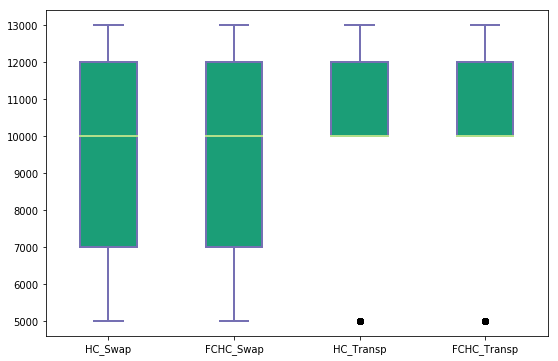

In [97]:

# def setLabelExample():
#     fig = pyplot.figure() 
#     x = [i for i in range(200)]
#     y = [xi**2 for xi in x]

#     ax = fig.add_subplot(1,1,1)
#     ax.plot(x, y) 
#     ax.tick_params(axis='x', labelsize=30)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(['HC_Swap', 'FCHC_Swap', 'HC_Transp', 'FCHC_Transp'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')